## Summary of Chicago Collision Data 

### Installed the required packages 
- Installed the required packages and also importing the functions required from other python files

In [158]:
import logging
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import sys
from os import environ
from IPython import embed
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from data_loading import data_loading, dataframe_columns_check
from data_cleaning import column_renaming, removing_duplicates, removing_missing_values
from helpers import data_summary

### Reading the raw data 
- Have passed the location of the raw data as a environment variable

In [159]:
# Path of the uploaded json file
path = environ['chicago_collision_data']

# Loading the data and assigning a name to the dataframe
chicago_collision_data = data_loading(path)
chicago_collision_data.name = 'chicago_collision_data'

### Checking if the required set of columns are present in the raw data

In [160]:
# Columns which are required in the uploaded data
required_columns = ['Genus', 'Species', 'Date', 'Locality']

# checking the required set of columns are present in the uploaded file
if dataframe_columns_check(chicago_collision_data, required_columns):
    print ("Columns in raw data:", list(chicago_collision_data.columns))
    print ("\nRequired columns:", required_columns)
    print ("\nCheck: The uploaded data has the required set of columns")
else:
    print ("Check: The uploaded data does not have the required set of columns")

Columns in raw data: ['Genus', 'Species', 'Date', 'Locality']

Required columns: ['Genus', 'Species', 'Date', 'Locality']

Check: The uploaded data has the required set of columns


### Renaming the columns as required 

In [161]:
print("Columns in raw data: ", list(chicago_collision_data.columns))
chicago_collision_data = column_renaming(chicago_collision_data, required=False)
print("\nColumns in processed data: ", list(chicago_collision_data.columns))

Columns in raw data:  ['Genus', 'Species', 'Date', 'Locality']

Columns in processed data:  ['Genus', 'Species', 'Date', 'Locality']


### Removing the duplicate rows in the data 

In [162]:
print("Row count in the raw data: ", chicago_collision_data.shape[0])
chicago_collision_data = removing_duplicates(chicago_collision_data)
print("Row count after removing duplicates: ", chicago_collision_data.shape[0])

Row count in the raw data:  69784
Row count after removing duplicates:  29761


### MIssing values treatment 

In [163]:
print("Row count in the raw data: ", chicago_collision_data.shape[0])
chicago_collision_data = removing_missing_values(chicago_collision_data)
print("Row count after removing rows with missing values: ", chicago_collision_data.shape[0])

Row count in the raw data:  29761
Row count after removing rows with missing values:  29761


### Data exploration analysis 

#### Basic data description 

In [164]:
data_summary(chicago_collision_data)

Dataframe name  : chicago_collision_data

Rows     :  29761
Columns  :  4

Features : 
 ['Genus', 'Species', 'Date', 'Locality']

Missing values in each column:   [0, 0, 0, 0]

Unique values :  
 Genus         43
Species       84
Date        5318
Locality       2
dtype: int64


 ######################################


In [165]:
# Anaysing the column data type
chicago_collision_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29761 entries, 0 to 69782
Data columns (total 4 columns):
Genus       29761 non-null object
Species     29761 non-null object
Date        29761 non-null datetime64[ns]
Locality    29761 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 1.1+ MB


#### Analysing the Genus and Species 

##### "Genus" with the highest death toll 

In [166]:
# grouping by the GEnus column to get the count of deaths by Genus
genus_toll = chicago_collision_data[['Genus']].pivot_table(index = ['Genus'], aggfunc ='size').reset_index().sort_values(0, ascending=False)
genus_toll.columns = ['Genus', 'Death_Toll']
genus_toll.head()

,Genus,Death_Toll
14,Melospiza,4003
32,Setophaga,3722
2,Catharus,3381
42,Zonotrichia,2880
18,Oreothlypis,2146


##### "Genus - Species" with the highest death toll 

In [167]:
# grouping by the Genus - Species columns to get the count of deaths by Genus - Species
genus_species_toll = chicago_collision_data[['Genus', 'Species']].pivot_table(index = ['Genus', 'Species'], aggfunc ='size').reset_index().sort_values(0, ascending=False)
genus_species_toll.columns = ['Genus', 'Species', 'Death_Toll']
genus_species_toll.head()

,Genus,Species,Death_Toll
88,Zonotrichia,albicollis,2280
27,Junco,hyemalis,1915
29,Melospiza,georgiana,1717
54,Seiurus,aurocapilla,1546
7,Catharus,guttatus,1400


#### "Locality" death toll distribution
- From the below plot, we can observe that both places have almost similar deaths overall
- Further analysis has been done below to check the distribution over the years

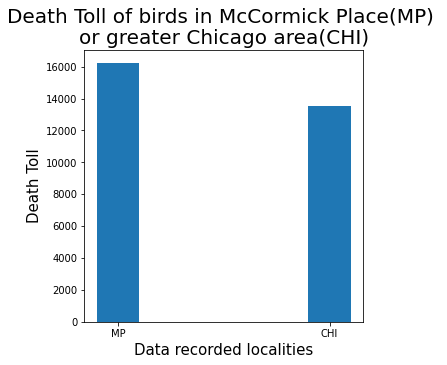

In [168]:
locality_toll = chicago_collision_data[['Locality']].pivot_table(index = ['Locality'], aggfunc ='size').reset_index().sort_values(0, ascending=False)
locality_toll.columns = ['Locality', 'Death_Toll']
locality_toll.head()

locality = locality_toll['Locality'].values.tolist()
toll = locality_toll['Death_Toll'].values.tolist()
   
fig = plt.figure(figsize = (5, 5)) 
  
# creating the bar plot 
plt.bar(locality, toll, width = 0.2) 
  
plt.xlabel("Data recorded localities", fontsize=15) 
plt.ylabel("Death Toll", fontsize=15) 
# plt.set_title('Title', pad=20)
plt.title("Death Toll of birds in McCormick Place(MP) \nor greater Chicago area(CHI)", fontsize=20) 
plt.show() 

#### Death toll distribution by "Date - Year"
- Analysing the time series, we can observe that the number of deaths have stared to increase steeply from 2003

In [174]:
chicago_collision_data['Date_year'] = chicago_collision_data['Date'].dt.strftime('%Y')
date_toll = chicago_collision_data[['Date_year']].pivot_table(index = ['Date_year'], aggfunc ='size').reset_index().sort_values('Date_year', ascending=False)
date_toll.columns = ['Date_year', 'Death_Toll']
date_toll.head()

fig = px.line(date_toll, x='Date_year', y='Death_Toll', 
              labels={
                     "Date_year": "Year",
                     "Death_Toll": "Death Toll",
                 },
              title="Death toll trend by year")
fig.update_layout(title=dict(
                    x=0.5,
                    y=0.9,
                    font=dict(
                    family="Arial",
                    size=20,
                    color='#000000'
                    )))
fig.show()

#### Death toll distribution by "Date - Year" filtered by location 
- Though the deaths have steeply inceased from 2004 as observed from the previous graph, majority of the contribution of these deaths come from MI location
- On the contrary, CHI location has definetly shown a falling trend of deaths

In [170]:
chicago_collision_data['Date_year'] = chicago_collision_data['Date'].dt.strftime('%Y')
date_toll = chicago_collision_data[['Date_year', 'Locality']].pivot_table(index = ['Date_year', 'Locality'], aggfunc ='size').reset_index().sort_values('Date_year', ascending=False)
date_toll.columns = ['Date_year', 'Locality', 'Death_Toll']
date_toll.head()


fig = px.line(date_toll, x='Date_year', y='Death_Toll', color='Locality', 
              labels={
                     "Date_year": "Year",
                     "Death_Toll": "Death Toll",
                 },
              title="Death toll trend by Year filtered by location")

fig.update_layout(title=dict(
                    x=0.5,
                    y=0.9,
                    font=dict(
                    family="Arial",
                    size=20,
                    color='#000000'
                    )))

# Show plot 
fig.show()


#### Death toll distribution by "Date - Month"
- Monthly analysis shows that, May, September and November, we can observe a steep rise in the number of deaths of birds
- This could probably be attributed to the migratory season of the birds 

In [171]:
chicago_collision_data['Date_month'] = chicago_collision_data['Date'].dt.month
date_toll = chicago_collision_data[['Date_month']].pivot_table(index = ['Date_month'], aggfunc ='size').reset_index().sort_values('Date_month', ascending=False)
date_toll.columns = ['Date_month', 'Death_Toll']
date_toll.head()

fig = px.line(date_toll, x='Date_month', y='Death_Toll', 
              labels={
                     "Date_month": "Month",
                     "Death_Toll": "Death Toll",
                 },
              title="Death toll trend by month")
fig.update_layout(title=dict(
                    x=0.5,
                    y=0.9,
                    font=dict(
                    family="Arial",
                    size=20,
                    color='#000000'
                    )))
fig.show()

#### Death toll distribution by "Date - Month" filtered by location 
- Location level analysis doesnot give us any further insight about the pattern observed in the previous plot
- The migratory trend of the birds in both the places could probably be the same

In [172]:
chicago_collision_data['Date_month'] = chicago_collision_data['Date'].dt.month
date_toll = chicago_collision_data[['Date_month', 'Locality']].pivot_table(index = ['Date_month', 'Locality'], aggfunc ='size').reset_index().sort_values('Date_month', ascending=False)
date_toll.columns = ['Date_month', 'Locality', 'Death_Toll']
date_toll.head()

fig = px.line(date_toll, x='Date_month', y='Death_Toll', color='Locality', 
              labels={
                     "Date_month": "Month",
                     "Death_Toll": "Death Toll",
                 },
              title="Death toll trend by month filtered by location")

fig.update_layout(title=dict(
                    x=0.5,
                    y=0.9,
                    font=dict(
                    family="Arial",
                    size=20,
                    color='#000000'
                    )))

# Show plot 
fig.show()


### Saving the processed data 

In [173]:
csv_files_address = "/home/sahit/Documents/MLE_opportunities_with_Tiger_Analytics/simple_dj_docker/media/CSV_files/"
file_name = os.path.join(csv_files_address,os.path.basename(path).split('.')[0])
chicago_collision_data.to_csv(file_name+'.csv', index=False)